In [13]:
image_size = (256, 256)
batch_size = 32

In [14]:
import tensorflow as tf
import pandas as pd

train_dir = '../data/train'
test_dir = '../data/test'

train_labels = list(pd.read_csv('../data/train_labels.csv').sort_values('image').iloc[:, 1])
test_labels = list(pd.read_csv('../data/test_labels.csv').sort_values('image').iloc[:, 1])

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels=train_labels,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels=test_labels,
    label_mode='categorical'
)

Found 35126 files belonging to 5 classes.
Found 53576 files belonging to 5 classes.


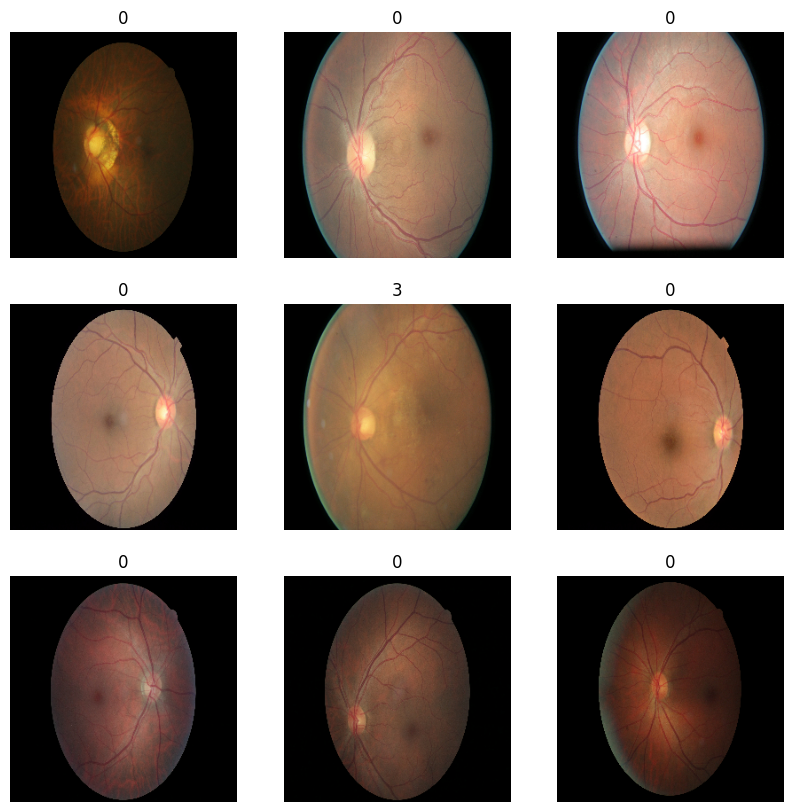

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()